# pytorchでLinear Regression とLogistic  Regression
* https://www.youtube.com/watch?v=YAJ5XBwlN4o&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=7
* https://www.youtube.com/watch?v=OGpQxIkR4ao&list=PLqnslRFeH2UrcDBWF5mfPGpqQDSta6VK4&index=8

## Linear Regression

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
# 0) prepare data
X_numpy, y_numpy = datasets.make_regression(
    n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape
print(X.shape)

torch.Size([100, 1])


In [3]:
# 1) model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [4]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch: 10, loss=4415.5420
epoch: 20, loss=3295.8318
epoch: 30, loss=2484.9915
epoch: 40, loss=1897.2283
epoch: 50, loss=1470.7729
epoch: 60, loss=1161.0894
epoch: 70, loss=936.0253
epoch: 80, loss=772.3398
epoch: 90, loss=653.2140
epoch: 100, loss=566.4641


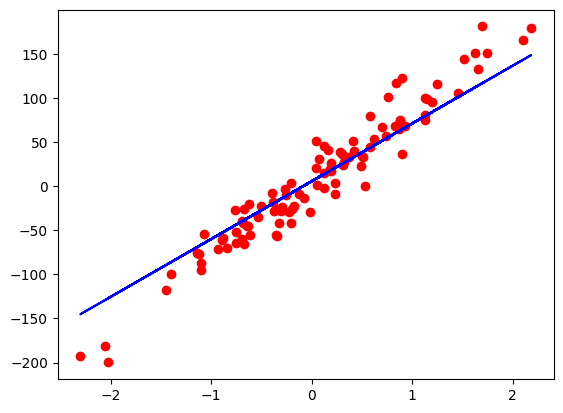

In [5]:
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss={loss.item():.4f}')

# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

## Logistic Regression

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [8]:
# 0) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

(569, 30)


In [12]:
n_features

30

In [14]:
# 1) model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

In [15]:
# 2) loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [18]:
# 3) training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  # backward pass
  loss.backward()

  # updates
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

  with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

accuracy = 0.7895
accuracy = 0.7895
accuracy = 0.7895
accuracy = 0.8158
accuracy = 0.8333
accuracy = 0.8333
accuracy = 0.8333
accuracy = 0.8333
accuracy = 0.8333
epoch: 10, loss = 0.4523
accuracy = 0.8333
accuracy = 0.8509
accuracy = 0.8509
accuracy = 0.8509
accuracy = 0.8509
accuracy = 0.8509
accuracy = 0.8596
accuracy = 0.8596
accuracy = 0.8596
accuracy = 0.8596
epoch: 20, loss = 0.3991
accuracy = 0.8596
accuracy = 0.8596
accuracy = 0.8596
accuracy = 0.8596
accuracy = 0.8596
accuracy = 0.8684
accuracy = 0.8684
accuracy = 0.8684
accuracy = 0.8684
accuracy = 0.8684
epoch: 30, loss = 0.3605
accuracy = 0.8684
accuracy = 0.8772
accuracy = 0.8772
accuracy = 0.8772
accuracy = 0.8772
accuracy = 0.8772
accuracy = 0.8772
accuracy = 0.8772
accuracy = 0.8772
accuracy = 0.8772
epoch: 40, loss = 0.3311
accuracy = 0.8772
accuracy = 0.8772
accuracy = 0.8772
accuracy = 0.8860
accuracy = 0.8860
accuracy = 0.8860
accuracy = 0.8947
accuracy = 0.8947
accuracy = 0.8947
accuracy = 0.8947
epoch: 50, loss = 